# Preprocessing + Otsu testing using the Dice score algorithm!

In [66]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [67]:
#Load all new functions

#Dice
def b_dice(x): # POSITIVE PIXELS = BACKGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #gt picture x
    pt = tresholded[x] #post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #not really needed, but does not influence the runtime
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND
    gt = ground_truth[x] 
    pt = tresholded[x] 
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    print(f_dsc)

#Otsu
def otsu_thresholding(img):
    n, bins, patches = plt.hist(img.flatten())
    copy = img.copy()
    thres = 0
    bcv = list()
    w0_sum = 0
    mean_sum0 = 0
    v0_sum = 0
    mean_sum1 = 0
    v1_sum = 0
    w0 = 0
    w1 = 0
    w1_sum = 0
    m1 = 0
    for i in range(0,len(n)):
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0
        for j in range(0,i):
            w0_sum += n[j]
            mean_sum0 += j*n[j]
            

        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i])
        for m in range(0,i):
            v0_sum += ((m-mean_0)**2)* n[m]
        
        v0 = v0_sum / sum(n[0:1])
        
        for k in range(i, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += k*n[k]
            
        w1 = w1_sum / sum(n)
        mean_1 = mean_sum1 / sum(n[i:len(n)])

        for s in range(i,len(n)):
            v1_sum += ((s-mean_1)**2)* n[s]
        
        v1 = v1_sum / sum(n[i:len(n)])
        bclv = w0 * v0 + w1 * v1
        bcv.append(bclv)
    optimal_thres = max(bcv)
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = l
        l += 1
    print(l) 

    for o in ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 255
    figure()  
    imshow(copy, 'gray')
    colorbar()
    return copy

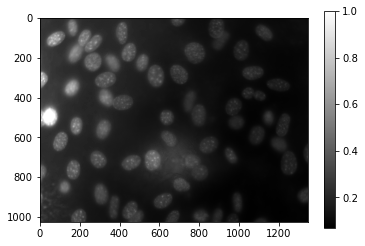

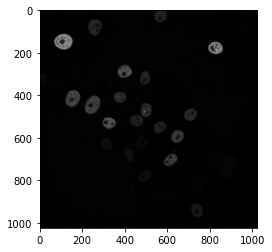

In [68]:
#Images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
figure()  
imshow(img_1, 'gray')
colorbar()


img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
figure()  
imshow(img_2, 'gray')

gt_1 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")

In [69]:
#Preprocessing


C:\Users\ievas\AppData\Local\Temp\ipykernel_19972\305315175.py:82: RuntimeWarning: invalid value encountered in double_scalars
  mean_0 = mean_sum0 / sum(n[0:i])


10


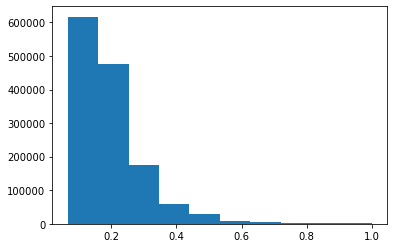

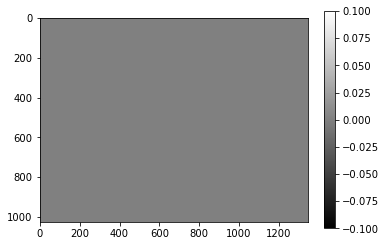

In [70]:
#Otsu
pt = otsu_thresholding(img_1)


In [71]:
#Dice score

tresholded = [pt]
ground_truth = [gt_1]
f_dice(0)
b_dice(0)

0.8524788225420954